**Task to accomplish based on data (Three datasets to be used)**

**Datasets:**

1. Flights dataset: Contains data about available routes from origin to destination.
2. Tickets dataset: Ticket prices data (sample data only as the data is huge). Consider
only round trips in your analysis.
3. Airport Codes dataset: Identifies whether an airport is considered medium or large sized.

**Business Questions**
1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Doesn't included canceled flights when performing the calculation.
2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.
3. The 5 round trip routes that you recommend to invest in based on any factors that you choose.
4. The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.
5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.


In [1]:
# Accessing google colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import Packages and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter
import seaborn as sns

In [3]:
# Function that load data and return dataframe
def read_dataset(path):
  df = pd.read_csv(path, low_memory=False)
  return df

In [4]:
def dataset_shape(df):
  return df.shape

In [5]:
def dataset_info(df):
  return df.info()

In [6]:
# Show Statistical description
def describe(df):
  pd.set_option('display.float_format', lambda x: '%.2f' % x)
  return df.describe()

In [7]:
# Returns the count of unique values for each column.
def unique_values(df):
  return df.nunique()

In [8]:
# Filter with simple condition
def filter(df, condition):
  df = df[condition]
  return df

In [9]:
# Checks count of missing values in each column of the dataframe
def check_missing_values(df):
  return df.isnull().sum()

In [10]:
# Returning rows where there is missign values in datframe
def display_rows_with_missing_values(df):
  return df[df.isnull().any(axis = 1)]

In [11]:
# Function that takes column name and data type and modify the column datatype
def change_dtype(df, column, dtype):
  df[column] = df[column].astype(dtype)

In [12]:
# Function that handle missing values
def handle_missing_value(df, column, value):
  df.loc[:, column] = df[column].fillna(value)

In [13]:
# Drop null values in column
def drop_nan_in_col(df, column):
  return df.dropna(subset=[column], inplace=True)

In [14]:
# Function to drop columns
def drop(df, columns):
  return df.drop(columns=columns, axis=1)

In [15]:
# Dropping duplicate values in dataframe
def drop_duplicate(df):
  df_unique = df.drop_duplicates()
  return df_unique

In [16]:
# Function to check Duplicate in dataframe return boolean
def duplicates(df):
  return df.duplicated()

In [17]:
# Function to check Duplicate in data frame: return duplicated rows
def duplicated_rows(df):
  duplicates = df[df.duplicated(keep=False)]
  return duplicates

In [18]:
# Changing Object to numeric
def to_numeric(df, column):
  df[column] = pd.to_numeric(df[column], errors="coerce")

In [19]:
# Changing date column from object to date
def to_datetime(df, column):
    df[column] = pd.to_datetime(df[column], format="mixed")

**Data Understanding and Quality Check**

**Flights Dataset:**

In [20]:
# Flights dataframe
flight_df = read_dataset("/content/drive/My Drive/Colab Notebooks/Capital One/datasets/Flights.csv")
flight_df.head(5)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [21]:
flight_df.tail(5)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1915881,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1915882,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1915883,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1915884,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344
1915885,3/27/19,AA,N945AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,5.0,0.0,117,****,0.350192


In [22]:
# Ticket dataset shape
dataset_shape(flight_df)

(1915886, 16)

In [23]:
dataset_info(flight_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [24]:
unique_values(flight_df)

,0
FL_DATE,134
OP_CARRIER,26
TAIL_NUM,6032
OP_CARRIER_FL_NUM,6935
ORIGIN_AIRPORT_ID,361
ORIGIN,361
ORIGIN_CITY_NAME,355
DEST_AIRPORT_ID,361
DESTINATION,361
DEST_CITY_NAME,355


In [25]:
# Checking missing values before filtering what is useful to the Analysisvalues
check_missing_values(flight_df)

,0
FL_DATE,0
OP_CARRIER,0
TAIL_NUM,12156
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0
DESTINATION,0
DEST_CITY_NAME,0


In [26]:
# Columns with missing values: TAIL_NUM, DEP_DELAY, ARR_DELAY, AIR_TIME, DISTANCE, OCCUPANCY_RATE

In [27]:
flight_df[(flight_df["ORIGIN"] == "SAT") & (flight_df["DESTINATION"] == "LAS")]

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
127,2019-03-02,WN,N8687A,4592,14683,SAT,"San Antonio, TX",12889,LAS,"Las Vegas, NV",0.0,-11.0,0.0,156.0,1069.0,0.72
128,2019-03-02,WN,N8603F,4736,14683,SAT,"San Antonio, TX",12889,LAS,"Las Vegas, NV",-6.0,13.0,0.0,171.0,1069.0,0.45
129,2019-03-02,WN,N8310C,4786,14683,SAT,"San Antonio, TX",12889,LAS,"Las Vegas, NV",-6.0,4.0,0.0,168.0,1069.0,0.47
130,2019-03-02,WN,N799SW,5307,14683,SAT,"San Antonio, TX",12889,LAS,"Las Vegas, NV",NaN,NaN,1.0,NaN,1069.0,0.67
3442,2019-03-09,WN,N8662F,3609,14683,SAT,"San Antonio, TX",12889,LAS,"Las Vegas, NV",6.0,-3.0,0.0,153.0,1069.0,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854968,2019-01-08,WN,N208WN,2260,14683,SAT,"San Antonio, TX",12889,LAS,"Las Vegas, NV",-4.0,-26.0,0.0,146.0,1069.0,0.81
1857087,2019-01-15,WN,N8552Z,741,14683,SAT,"San Antonio, TX",12889,LAS,"Las Vegas, NV",-4.0,0.0,0.0,169.0,1069.0,0.86
1857088,2019-01-15,WN,N271LV,749,14683,SAT,"San Antonio, TX",12889,LAS,"Las Vegas, NV",13.0,7.0,0.0,151.0,1069.0,0.34
1857089,2019-01-15,WN,N8519R,2244,14683,SAT,"San Antonio, TX",12889,LAS,"Las Vegas, NV",-2.0,-8.0,0.0,154.0,1069.0,0.88


In [28]:
"""
Since need observations need to answer the business question and come up with recommendations will not consider CANCELLED flights.
I will filters only those I will need.
"""
flight_df = filter(flight_df, flight_df["CANCELLED"] != 1)

In [29]:
# Changing the types of data based on what it should be (AIR_TIME) it has to be numeric
to_numeric(flight_df, "AIR_TIME")
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1864272 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           float64
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(5), int64(2), object(9)
memory usage: 241.8+ MB


In [30]:
# Checking missing values in column after fetching only data from uncancelled flights
check_missing_values(flight_df)

,0
FL_DATE,0
OP_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0
DESTINATION,0
DEST_CITY_NAME,0


In [31]:
# Converting DISTANCE from object to numeric and also converting FL_DATE into datetime
# FL_DATE: this has different format: which I handled with to_datetime with parameters that handle multiple format
to_numeric(flight_df, "DISTANCE")
to_datetime(flight_df, "FL_DATE")

In [32]:
# Checking duplicates in dataframe
duplicated_rows(flight_df).sort_values(by="FL_DATE")

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1915394,2019-01-01,B6,N965WN,6534,14635,RSW,"Fort Myers, FL",14307,PVD,"Providence, RI",-5.0,-13.0,0.0,656.0,2.0,0.375903
1910849,2019-01-01,B6,N965WN,6534,14635,RSW,"Fort Myers, FL",14307,PVD,"Providence, RI",-5.0,-13.0,0.0,656.0,2.0,0.375903
1911354,2019-01-01,B6,N965WN,6534,14635,RSW,"Fort Myers, FL",14307,PVD,"Providence, RI",-5.0,-13.0,0.0,656.0,2.0,0.375903
1912364,2019-01-01,B6,N965WN,6534,14635,RSW,"Fort Myers, FL",14307,PVD,"Providence, RI",-5.0,-13.0,0.0,656.0,2.0,0.375903
1913374,2019-01-01,B6,N965WN,6534,14635,RSW,"Fort Myers, FL",14307,PVD,"Providence, RI",-5.0,-13.0,0.0,656.0,2.0,0.375903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911578,2019-03-31,AA,N390AA,1422,14100,PHL,"Philadelphia, PA",13303,MIA,"Miami, FL",10.0,2.0,0.0,NaN,1013.0,0.730633
1912466,2019-03-31,AA,N987NN,1408,14831,SJC,"San Jose, CA",14107,PHX,"Phoenix, AZ",-6.0,-9.0,0.0,NaN,NaN,0.820804
1914434,2019-03-31,AA,N9677W,1406,11298,DFW,"Dallas/Fort Worth, TX",14683,SAT,"San Antonio, TX",11.0,14.0,0.0,46.0,NaN,0.915641
1911609,2019-03-31,AA,N937NN,1423,13303,MIA,"Miami, FL",11057,CLT,"Charlotte, NC",-7.0,-8.0,0.0,NaN,650.0,0.749565


In [33]:
# Dropping duplicate values from Ticket Data Frame: Above shows 4900 rows are duplicates for entire row.
flight_df = drop_duplicate(flight_df)

In [34]:
# Checking missing values in entire dataset
display_rows_with_missing_values(flight_df)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
618,2019-03-03,WN,N7820L,2367,10397,ATL,"Atlanta, GA",12191,HOU,"Houston, TX",-4.0,NaN,0.0,NaN,696.0,0.970000
824,2019-03-03,WN,N700GS,2423,10693,BNA,"Nashville, TN",12191,HOU,"Houston, TX",0.0,NaN,0.0,NaN,670.0,0.320000
1504,2019-03-09,WN,N743SW,5433,11481,ECP,"Panama City, FL",11259,DAL,"Dallas, TX",-5.0,NaN,0.0,NaN,674.0,0.350000
1543,2019-03-09,WN,N940WN,3221,11697,FLL,"Fort Lauderdale, FL",10693,BNA,"Nashville, TN",0.0,NaN,0.0,NaN,793.0,0.400000
1683,2019-03-09,WN,N208WN,5483,12191,HOU,"Houston, TX",11259,DAL,"Dallas, TX",92.0,NaN,0.0,NaN,239.0,0.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911336,2019-03-23,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112.0,NaN,0.794884
1911337,2019-03-24,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106.0,NaN,0.538399
1911338,2019-03-25,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106.0,NaN,0.955579
1911339,2019-03-26,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112.0,NaN,0.595344


In [35]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859862 entries, 0 to 1911340
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   OP_CARRIER         object        
 2   TAIL_NUM           object        
 3   OP_CARRIER_FL_NUM  object        
 4   ORIGIN_AIRPORT_ID  int64         
 5   ORIGIN             object        
 6   ORIGIN_CITY_NAME   object        
 7   DEST_AIRPORT_ID    int64         
 8   DESTINATION        object        
 9   DEST_CITY_NAME     object        
 10  DEP_DELAY          float64       
 11  ARR_DELAY          float64       
 12  CANCELLED          float64       
 13  AIR_TIME           float64       
 14  DISTANCE           float64       
 15  OCCUPANCY_RATE     float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(7)
memory usage: 241.2+ MB


In [36]:
check_missing_values(flight_df)

,0
FL_DATE,0
OP_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0
DESTINATION,0
DEST_CITY_NAME,0


In [37]:
# Handling missing values in flight dataset
# Start with DEP_DELAY, ARR_DELAY
"""
Since DEP_DELAY and ARR_DELAY are NAN I drop them as there small portion of data, dropping them affect Analysis
"""
drop_nan_in_col(flight_df, "ARR_DELAY")

In [38]:
# Handling missing values in OCCOPANCY_RATE: since all plane will have same capacity of holding 200 passengers
# Fill the missing value with the mean of the entire OCCUPANCY_RATE column
handle_missing_value(flight_df, "OCCUPANCY_RATE", flight_df["OCCUPANCY_RATE"].mean())

In [39]:
check_missing_values(flight_df)

,0
FL_DATE,0
OP_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0
DESTINATION,0
DEST_CITY_NAME,0


In [40]:
len(flight_df)

1855494

In [41]:
describe(flight_df)

,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
count,1855494,1855494.00,1855494.00,1855494.00,1855494.00,1855494.00,1855246.00,1855227.00,1855494.00
mean,2019-02-15 10:26:04.215244032,12686.00,12686.02,10.73,5.66,0.00,109.34,771.93,0.65
min,2019-01-01 00:00:00,10135.00,10135.00,-63.00,-94.00,0.00,-121.00,-1947.00,0.30
25%,2019-01-24 00:00:00,11292.00,11292.00,-6.00,-15.00,0.00,59.00,344.00,0.48
50%,2019-02-16 00:00:00,12889.00,12889.00,-2.00,-6.00,0.00,91.00,612.00,0.65
75%,2019-03-10 00:00:00,14057.00,14057.00,7.00,8.00,0.00,139.00,1013.00,0.82
max,2019-03-31 00:00:00,16218.00,16218.00,2941.00,2923.00,0.00,2222.00,9898.00,1.00
std,NaN,1521.71,1521.64,49.98,52.43,0.00,70.26,581.44,0.20


In [42]:
flight_df[flight_df["DISTANCE"] < 0]

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1910957,2019-03-06,AA,N943NN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-5.00,6.00,0.00,NaN,-1947.00,0.48
1910958,2019-03-07,AA,N306PB,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-1.00,-10.00,0.00,NaN,-1947.00,0.52
1910959,2019-03-08,AA,N970AN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",24.00,41.00,0.00,NaN,-1947.00,0.49
1910960,2019-03-09,AA,N925NN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-5.00,16.00,0.00,NaN,-1947.00,0.56
1910961,2019-03-10,AA,N957AN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-3.00,-14.00,0.00,NaN,-1947.00,0.74
1910962,2019-03-11,AA,N979NN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-6.00,-3.00,0.00,NaN,-1947.00,0.72
1910963,2019-03-12,AA,N937AN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-2.00,-9.00,0.00,279.00,-1947.00,0.38
1910965,2019-03-08,AA,N997NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",4.00,-9.00,0.00,-121.00,-198.00,0.34
1910966,2019-03-09,AA,N996NN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-5.00,1.00,0.00,-121.00,-198.00,0.82
1910967,2019-03-10,AA,N909AN,1414,12478,JFK,"New York, NY",13930,ORD,"Chicago, IL",-2.00,-12.00,0.00,-121.00,-198.00,0.96


In [43]:
flight_df[(flight_df["ORIGIN"] == "ATL") & (flight_df["DESTINATION"] == "LAX")]

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
633,2019-03-03,WN,N8657B,2949,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",1.00,8.00,0.00,288.00,1947.00,0.66
634,2019-03-03,WN,N8554X,3161,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",26.00,39.00,0.00,302.00,1947.00,1.00
635,2019-03-03,WN,N8734Q,5084,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",9.00,-7.00,0.00,275.00,1947.00,0.67
4060,2019-03-10,WN,N8646B,684,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",3.00,9.00,0.00,285.00,1947.00,0.77
4062,2019-03-10,WN,N7839A,4449,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",55.00,62.00,0.00,292.00,1947.00,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910959,2019-03-08,AA,N970AN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",24.00,41.00,0.00,NaN,-1947.00,0.49
1910960,2019-03-09,AA,N925NN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-5.00,16.00,0.00,NaN,-1947.00,0.56
1910961,2019-03-10,AA,N957AN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-3.00,-14.00,0.00,NaN,-1947.00,0.74
1910962,2019-03-11,AA,N979NN,1409,10397,ATL,"Atlanta, GA",12892,LAX,"Los Angeles, CA",-6.00,-3.00,0.00,NaN,-1947.00,0.72


In [44]:
check_missing_values(flight_df)

,0
FL_DATE,0
OP_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0
DESTINATION,0
DEST_CITY_NAME,0


In [45]:
# Handling negative numbers for distance
"""
Below function handle negative values in columns: DISTANCE, DEP_DELAY, ARR_DELAY.
Distance for specific routes I assume I will be the same except any incorret record or anomialies
and took the mode for each group of route and replace the value where I have negative number:
example: distance from RWS --> CLE will be the same everytime, where I found negative I will replace it with mode of positive value in the group of route RWS --> CLE

For DEP_DELAY, ARR_DELAY which is negative number as metadata says it considered to be Early I considered them on time which doesn't affect out revenue or cost.
"""
def handle_neg_number(df, column_name):
  grouped = df.groupby(["ORIGIN", "DESTINATION"])
  mode = grouped[column_name].apply(lambda x: x.where(x >= 0).mode().iloc[0])
  df[column_name] = df.apply(lambda row: mode[(row['ORIGIN'], row['DESTINATION'])] if row[column_name] < 0 else row[column_name], axis=1)
  return df

In [46]:
def handle_missing_value_with_group(df, column_name):
  grouped = df.groupby(["ORIGIN", "DESTINATION"])
  mean = grouped[column_name].apply(lambda x: x.dropna().mean())
  df[column_name] = df.apply(lambda row: mean[(row["ORIGIN"], row["DESTINATION"])] if pd.isna(row[column_name]) else row[column_name], axis=1)
  return df

In [47]:
# Handling Negative numbers as incorrect entry value DISTANCE COLUMN
handle_neg_number(flight_df, "DISTANCE")

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.00,-6.00,0.00,143.00,1025.00,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.00,5.00,0.00,135.00,930.00,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.00,4.00,0.00,132.00,930.00,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.00,14.00,0.00,136.00,930.00,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.00,-17.00,0.00,151.00,1005.00,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911336,2019-03-23,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.00,-6.00,0.00,112.00,NaN,0.79
1911337,2019-03-24,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.00,-1.00,0.00,106.00,NaN,0.54
1911338,2019-03-25,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.00,-25.00,0.00,106.00,NaN,0.96
1911339,2019-03-26,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.00,-6.00,0.00,112.00,NaN,0.60


In [48]:
# Handling NaN for DISTANCE AND AIRTIME COLUMN
handle_missing_value_with_group(flight_df, "DISTANCE")

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.00,-6.00,0.00,143.00,1025.00,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.00,5.00,0.00,135.00,930.00,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.00,4.00,0.00,132.00,930.00,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.00,14.00,0.00,136.00,930.00,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.00,-17.00,0.00,151.00,1005.00,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911336,2019-03-23,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.00,-6.00,0.00,112.00,842.00,0.79
1911337,2019-03-24,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.00,-1.00,0.00,106.00,842.00,0.54
1911338,2019-03-25,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.00,-25.00,0.00,106.00,842.00,0.96
1911339,2019-03-26,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.00,-6.00,0.00,112.00,842.00,0.60


In [49]:
check_missing_values(flight_df)

,0
FL_DATE,0
OP_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0
DESTINATION,0
DEST_CITY_NAME,0


In [50]:
flight_df[flight_df["DISTANCE"] < 0]

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE


In [51]:
"""
Since some of the features (Columns) do not contribute to final goal which is to answer the business question.
I am considering removing them. These are: OP_CARRIER, OP_CARRIER_FL_NUM, FL_DATE, AIR_TIME, CANCELLED.
I also consider dropping CANCELLED sence I filtered UNCANCELLED flights.
Drop ORIGIN_AIRPORT_ID, DEST_AIRPORT_ID, ORIGIN_CITY_NAME, DEST_CITY_NAME. Since ORIGIN and DESTINATION are ATA Airport codes which is unique for each airport
and are presented in other dataframes I will keep them and drop the IDs and CITY NAME as I can easily get them if I have ATA Airport code
"""
drop_columns_list = ["FL_DATE", "TAIL_NUM", "OP_CARRIER", "OP_CARRIER_FL_NUM", "AIR_TIME", "CANCELLED", "ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID", "ORIGIN_CITY_NAME", "DEST_CITY_NAME"]
flight_df = drop(flight_df, drop_columns_list)
flight_df

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
0,RSW,CLE,-8.00,-6.00,1025.00,0.97
1,RSW,CMH,1.00,5.00,930.00,0.55
2,RSW,CMH,0.00,4.00,930.00,0.91
3,RSW,CMH,11.00,14.00,930.00,0.67
4,RSW,DAL,0.00,-17.00,1005.00,0.62
...,...,...,...,...,...,...
1911336,TUL,CLT,-9.00,-6.00,842.00,0.79
1911337,TUL,CLT,-2.00,-1.00,842.00,0.54
1911338,TUL,CLT,-8.00,-25.00,842.00,0.96
1911339,TUL,CLT,-9.00,-6.00,842.00,0.60


In [52]:
describe(flight_df)

,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
count,1855494.00,1855494.00,1855494.00,1855494.00
mean,10.73,5.66,771.98,0.65
std,49.98,52.43,581.40,0.20
min,-63.00,-94.00,2.00,0.30
25%,-6.00,-15.00,344.00,0.48
50%,-2.00,-6.00,612.00,0.65
75%,7.00,8.00,1013.00,0.82
max,2941.00,2923.00,9898.00,1.00


In [53]:
def create_boxplot(df, columns):
  num_columns = len(columns)
  num_rows = (num_columns + 1) // 2
  fig, axes =plt.subplots(num_rows, 2, figsize=(10,6))
  for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    axes[row, col].boxplot(df[column].dropna())
    axes[row, col].set_title(column.replace("_", " ").title())

  if num_columns % 2 != 0:
    fig.delaxes(axes[-1, -1])
  plt.tight_layout()
  plt.show()

In [54]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1855494 entries, 0 to 1911340
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ORIGIN          object 
 1   DESTINATION     object 
 2   DEP_DELAY       float64
 3   ARR_DELAY       float64
 4   DISTANCE        float64
 5   OCCUPANCY_RATE  float64
dtypes: float64(4), object(2)
memory usage: 99.1+ MB


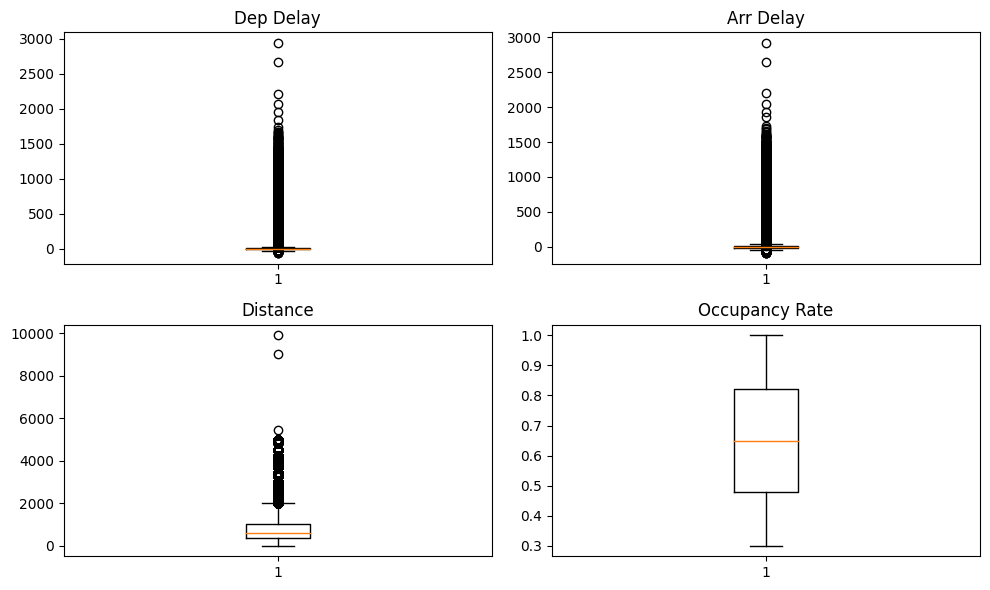

In [55]:
columns = ["DEP_DELAY", "ARR_DELAY", "DISTANCE", "OCCUPANCY_RATE"]
create_boxplot(flight_df, columns)

In [56]:
lower_bound = 0
upper_bound = 0
def removing_outlier_with_IQR(df, column):
  """
  Function that handles outlier in particular column in dataset
  """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



In [57]:
#Handling outliers in columns
flight_df = removing_outlier_with_IQR(flight_df, "DEP_DELAY")
flight_df = removing_outlier_with_IQR(flight_df, "ARR_DELAY")
flight_df = removing_outlier_with_IQR(flight_df, "DISTANCE")
flight_df

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
0,RSW,CLE,-8.00,-6.00,1025.00,0.97
1,RSW,CMH,1.00,5.00,930.00,0.55
2,RSW,CMH,0.00,4.00,930.00,0.91
3,RSW,CMH,11.00,14.00,930.00,0.67
4,RSW,DAL,0.00,-17.00,1005.00,0.62
...,...,...,...,...,...,...
1911336,TUL,CLT,-9.00,-6.00,842.00,0.79
1911337,TUL,CLT,-2.00,-1.00,842.00,0.54
1911338,TUL,CLT,-8.00,-25.00,842.00,0.96
1911339,TUL,CLT,-9.00,-6.00,842.00,0.60


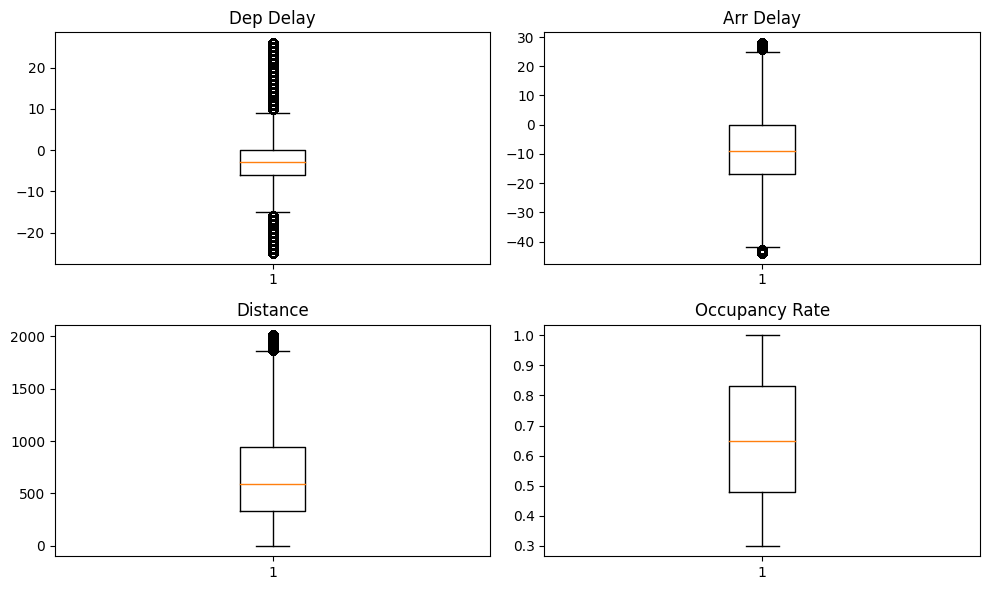

In [58]:
# checking outlier after handling them
columns = ["DEP_DELAY", "ARR_DELAY", "DISTANCE", "OCCUPANCY_RATE"]
create_boxplot(flight_df, columns)

In [59]:
"""
After Handling outliers for ARR_DELAY AND DEP_DELAY some remain in the in the data set,
 but major are ZERO which is not an issue since it mean the flight was on schedules
"""

'\nAfter Handling outliers for ARR_DELAY AND DEP_DELAY some remain in the in the data set,\n but major are ZERO which is not an issue since it mean the flight was on schedules\n'

In [60]:
flight_df[(flight_df["ORIGIN"] == "MIA") & (flight_df["DESTINATION"] == "IND")]

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
31168,MIA,IND,-6.00,-19.00,1020.00,0.37
31169,MIA,IND,-9.00,-7.00,1020.00,0.97
31170,MIA,IND,-3.00,0.00,1020.00,0.65
31171,MIA,IND,-7.00,-16.00,1020.00,0.91
31172,MIA,IND,-10.00,-1.00,1020.00,0.83
...,...,...,...,...,...,...
1615194,MIA,IND,3.00,-17.00,1020.00,1.00
1615195,MIA,IND,-10.00,-27.00,1020.00,0.97
1615196,MIA,IND,-1.00,-3.00,1020.00,0.46
1615197,MIA,IND,-2.00,9.00,1020.00,0.85


In [61]:
flight_df = flight_df.assign(TRIP_ROUTE=flight_df["ORIGIN"] + "-" + flight_df["DESTINATION"])
flight_df

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,TRIP_ROUTE
0,RSW,CLE,-8.00,-6.00,1025.00,0.97,RSW-CLE
1,RSW,CMH,1.00,5.00,930.00,0.55,RSW-CMH
2,RSW,CMH,0.00,4.00,930.00,0.91,RSW-CMH
3,RSW,CMH,11.00,14.00,930.00,0.67,RSW-CMH
4,RSW,DAL,0.00,-17.00,1005.00,0.62,RSW-DAL
...,...,...,...,...,...,...,...
1911336,TUL,CLT,-9.00,-6.00,842.00,0.79,TUL-CLT
1911337,TUL,CLT,-2.00,-1.00,842.00,0.54,TUL-CLT
1911338,TUL,CLT,-8.00,-25.00,842.00,0.96,TUL-CLT
1911339,TUL,CLT,-9.00,-6.00,842.00,0.60,TUL-CLT


**TICKETS DATASETA**

In [62]:
ticket_df = read_dataset("/content/drive/My Drive/Colab Notebooks/Capital One/datasets/Tickets.csv")
ticket_df.head(5)

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.00,MQ,1.00,309.0,MGM


In [63]:
ticket_df.tail(5)

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
1167280,201911284909,2019,1,YAK,US,AK,Alaska,0.00,AS,1.00,244.0,ANC
1167281,201911284959,2019,1,YAK,US,AK,Alaska,1.00,AS,1.00,371.0,JNU
1167282,201911284940,2019,1,YAK,US,AK,Alaska,0.00,AS,1.00,271.0,JNU
1167283,201911284914,2019,1,YAK,US,AK,Alaska,0.00,AS,1.00,603.0,ANC
1167284,201911284952,2019,1,YAK,US,AK,Alaska,1.00,AS,1.00,299.0,JNU


In [64]:
# Ticket dataset shape
dataset_shape(ticket_df)

(1167285, 12)

In [65]:
dataset_info(ticket_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


In [66]:
unique_values(ticket_df)

,0
ITIN_ID,1094911
YEAR,1
QUARTER,1
ORIGIN,419
ORIGIN_COUNTRY,1
ORIGIN_STATE_ABR,52
ORIGIN_STATE_NM,52
ROUNDTRIP,2
REPORTING_CARRIER,21
PASSENGERS,286


In [67]:
"""
I will consider filtering only round-trip tickets. since useful for answering my business problem.
I will filter where (ROUNDTRIP == 1)
"""
ticket_df = filter(ticket_df, ticket_df["ROUNDTRIP"] == 1)

In [68]:
duplicates = ticket_df.duplicated()
duplicates

,0
0,False
1,False
2,False
3,False
10,False
...,...
1167275,True
1167277,True
1167279,True
1167281,True


In [69]:
len(ticket_df)

708600

In [70]:
duplicated_rows(ticket_df).sort_values(by="ITIN_ID")

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
1036403,20191206,2019,1,ABE,US,PA,Pennsylvania,1.00,9E,1.00,349.0,HOU
52576,20191206,2019,1,ABE,US,PA,Pennsylvania,1.00,9E,1.00,349.0,HOU
1036366,20191377,2019,1,ABE,US,PA,Pennsylvania,1.00,9E,1.00,548.0,SLC
53013,20191377,2019,1,ABE,US,PA,Pennsylvania,1.00,9E,1.00,548.0,SLC
58566,20191463,2019,1,AEX,US,LA,Louisiana,1.00,9E,1.00,306.0,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...
1114770,201915257275,2019,1,VPS,US,FL,Florida,1.00,YX,1.00,314.0,PHL
1114971,201915257577,2019,1,XNA,US,AR,Arkansas,1.00,YX,1.00,386.0,MCO
1034713,201915257577,2019,1,XNA,US,AR,Arkansas,1.00,YX,1.00,386.0,MCO
1034733,201915257772,2019,1,XNA,US,AR,Arkansas,1.00,YX,1.00,531.0,LGA


In [71]:
len(duplicated_rows(ticket_df).sort_values(by="ITIN_ID"))

95121

In [72]:
# Dropping duplicate values from Ticket Data Frame
ticket_df = drop_duplicate(ticket_df)

In [73]:
ticket_df.value_counts()

,,,,,,,,,,,,count
ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION,
2019119,2019,1,ABE,US,PA,Pennsylvania,1.00,9E,1.00,28.0,ATL,1
201913524667,2019,1,AUS,US,TX,Texas,1.00,UA,1.00,1528.0,SFO,1
201913524843,2019,1,AUS,US,TX,Texas,1.00,UA,1.00,1753.0,LIH,1
201913524845,2019,1,AUS,US,TX,Texas,1.00,UA,3.00,0.0,LIH,1
201913524846,2019,1,AUS,US,TX,Texas,1.00,UA,1.00,1011.0,LIH,1
...,...,...,...,...,...,...,...,...,...,...,...,...
201912011192,2019,1,LAX,US,CA,California,1.00,DL,1.00,687.0,TPA,1
201912011195,2019,1,LAX,US,CA,California,1.00,DL,1.00,696.0,TPA,1
201912011199,2019,1,LAX,US,CA,California,1.00,DL,1.00,707.0,TPA,1


In [74]:
ticket_df

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,345.0,LGA
10,201912723337,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,1647.0,JAX
...,...,...,...,...,...,...,...,...,...,...,...,...
1115053,201915099493,2019,1,YUM,US,AZ,Arizona,1.00,YV,1.00,585.0,FLL
1115057,201913421100,2019,1,YUM,US,AZ,Arizona,1.00,OO,1.00,692.0,ALB
1115058,201913421044,2019,1,YUM,US,AZ,Arizona,1.00,OO,1.00,600,MRY
1115066,201913420834,2019,1,YUM,US,AZ,Arizona,1.00,OO,1.00,705.0,ELP


In [75]:
dataset_info(ticket_df)

<class 'pandas.core.frame.DataFrame'>
Index: 661036 entries, 0 to 1115067
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            661036 non-null  int64  
 1   YEAR               661036 non-null  int64  
 2   QUARTER            661036 non-null  int64  
 3   ORIGIN             661036 non-null  object 
 4   ORIGIN_COUNTRY     661036 non-null  object 
 5   ORIGIN_STATE_ABR   661036 non-null  object 
 6   ORIGIN_STATE_NM    661036 non-null  object 
 7   ROUNDTRIP          661036 non-null  float64
 8   REPORTING_CARRIER  661036 non-null  object 
 9   PASSENGERS         660076 non-null  float64
 10  ITIN_FARE          660585 non-null  object 
 11  DESTINATION        661036 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 65.6+ MB


In [76]:
non_numeric_value = ticket_df[pd.to_numeric(ticket_df["ITIN_FARE"], errors = "coerce").isna()]
non_numeric_value

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
1730,201913102587,2019,1,ABY,US,GA,Georgia,1.00,OO,1.00,820$$$,DCA
3473,201913103359,2019,1,ACV,US,CA,California,1.00,OO,1.00,820$$$,DEN
6573,201913118270,2019,1,BGM,US,NY,New York,1.00,OO,1.00,200 $,SAV
10233,201912575050,2019,1,CKB,US,WV,West Virginia,1.00,G4,3.00,$ 100.00,SFB
11541,201913161681,2019,1,CYS,US,WY,Wyoming,1.00,OO,1.00,200 $,DFW
...,...,...,...,...,...,...,...,...,...,...,...,...
1114082,201911086275,2019,1,TUL,US,OK,Oklahoma,1.00,AA,1.00,NaN,LBB
1114093,201915093514,2019,1,TUL,US,OK,Oklahoma,1.00,YV,1.00,NaN,RNO
1114735,201912429522,2019,1,TYS,US,TN,Tennessee,1.00,DL,1.00,NaN,ATL
1114883,201911099385,2019,1,XNA,US,AR,Arkansas,1.00,AA,1.00,NaN,SAN


In [77]:
"""
To deal with invalid ITIN_FARE data, I implement replace with regex to keep only numbers
"""
ticket_df.loc[:, "ITIN_FARE"] = ticket_df["ITIN_FARE"].str.replace(r'\D', '', regex=True)

In [78]:
change_dtype(ticket_df, "ITIN_FARE", np.float64)

In [79]:
dataset_info(ticket_df)

<class 'pandas.core.frame.DataFrame'>
Index: 661036 entries, 0 to 1115067
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            661036 non-null  int64  
 1   YEAR               661036 non-null  int64  
 2   QUARTER            661036 non-null  int64  
 3   ORIGIN             661036 non-null  object 
 4   ORIGIN_COUNTRY     661036 non-null  object 
 5   ORIGIN_STATE_ABR   661036 non-null  object 
 6   ORIGIN_STATE_NM    661036 non-null  object 
 7   ROUNDTRIP          661036 non-null  float64
 8   REPORTING_CARRIER  661036 non-null  object 
 9   PASSENGERS         660076 non-null  float64
 10  ITIN_FARE          660585 non-null  float64
 11  DESTINATION        661036 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 65.6+ MB


In [80]:
check_missing_values(ticket_df)

,0
ITIN_ID,0
YEAR,0
QUARTER,0
ORIGIN,0
ORIGIN_COUNTRY,0
ORIGIN_STATE_ABR,0
ORIGIN_STATE_NM,0
ROUNDTRIP,0
REPORTING_CARRIER,0
PASSENGERS,960


In [81]:
non_numeric_value = ticket_df[pd.to_numeric(ticket_df["ITIN_FARE"], errors = "coerce").isna()]
non_numeric_value

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
52839,201912560800,2019,1,ABE,US,PA,Pennsylvania,1.00,G4,2.00,NaN,PGD
54444,201914284416,2019,1,ABQ,US,NM,New Mexico,1.00,WN,1.00,NaN,SLC
62586,20191120728,2019,1,ALB,US,NY,New York,1.00,AA,1.00,NaN,SJU
71845,201915558,2019,1,ATL,US,GA,Georgia,1.00,9E,1.00,NaN,TUL
83647,201913510278,2019,1,ATL,US,GA,Georgia,1.00,UA,1.00,NaN,FCA
...,...,...,...,...,...,...,...,...,...,...,...,...
1114082,201911086275,2019,1,TUL,US,OK,Oklahoma,1.00,AA,1.00,NaN,LBB
1114093,201915093514,2019,1,TUL,US,OK,Oklahoma,1.00,YV,1.00,NaN,RNO
1114735,201912429522,2019,1,TYS,US,TN,Tennessee,1.00,DL,1.00,NaN,ATL
1114883,201911099385,2019,1,XNA,US,AR,Arkansas,1.00,AA,1.00,NaN,SAN


In [82]:
# Handling missing values in ITIN_FARE
handle_missing_value_with_group(ticket_df, "ITIN_FARE")

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,7360.00,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,5700.00,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,5640.00,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,3450.00,LGA
10,201912723337,2019,1,ABI,US,TX,Texas,1.00,MQ,1.00,16470.00,JAX
...,...,...,...,...,...,...,...,...,...,...,...,...
1115053,201915099493,2019,1,YUM,US,AZ,Arizona,1.00,YV,1.00,5850.00,FLL
1115057,201913421100,2019,1,YUM,US,AZ,Arizona,1.00,OO,1.00,6920.00,ALB
1115058,201913421044,2019,1,YUM,US,AZ,Arizona,1.00,OO,1.00,600.00,MRY
1115066,201913420834,2019,1,YUM,US,AZ,Arizona,1.00,OO,1.00,7050.00,ELP


In [83]:
check_missing_values(ticket_df)

,0
ITIN_ID,0
YEAR,0
QUARTER,0
ORIGIN,0
ORIGIN_COUNTRY,0
ORIGIN_STATE_ABR,0
ORIGIN_STATE_NM,0
ROUNDTRIP,0
REPORTING_CARRIER,0
PASSENGERS,960


In [84]:
"""
Since these are routes with one record in whole dataset and also has null value for ITIN_FARE, I would drop them as
there are small portion of the data.
"""
non_numeric_value = ticket_df[pd.to_numeric(ticket_df["ITIN_FARE"], errors = "coerce").isna()]
non_numeric_value

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
236767,201913160021,2019,1,CPR,US,WY,Wyoming,1.00,OO,1.00,NaN,EUG
930878,201911004520,2019,1,SFO,US,CA,California,1.00,AA,1.00,NaN,ISP
1037326,201912727226,2019,1,AMA,US,TX,Texas,1.00,MQ,1.00,NaN,STX
1045402,201912734102,2019,1,BTR,US,LA,Louisiana,1.00,MQ,1.00,NaN,MLI
1045506,20191210324,2019,1,BTV,US,VT,Vermont,1.00,AA,1.00,NaN,SWF
1059289,201911821379,2019,1,ECP,US,FL,Florida,1.00,DL,1.00,NaN,FWA
1063915,20191433856,2019,1,GEG,US,WA,Washington,1.00,AA,1.00,NaN,EWN
1068787,201913232309,2019,1,IDA,US,ID,Idaho,1.00,OO,1.00,NaN,EKO
1093350,20191827519,2019,1,PHL,US,PA,Pennsylvania,1.00,AA,3.00,NaN,SJT
1110953,201913399147,2019,1,SNA,US,CA,California,1.00,OO,1.00,NaN,GUM


In [85]:
ticket_df[(ticket_df["ORIGIN"] == "CPR") & (ticket_df["DESTINATION"] == "EUG")]

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
236767,201913160021,2019,1,CPR,US,WY,Wyoming,1.00,OO,1.00,NaN,EUG


In [86]:
# Dropping missing values where there is one record for the route (Origin to destination)
drop_nan_in_col(ticket_df, "ITIN_FARE")

In [87]:
check_missing_values(ticket_df)

,0
ITIN_ID,0
YEAR,0
QUARTER,0
ORIGIN,0
ORIGIN_COUNTRY,0
ORIGIN_STATE_ABR,0
ORIGIN_STATE_NM,0
ROUNDTRIP,0
REPORTING_CARRIER,0
PASSENGERS,960


In [88]:
"""
Considering above function results that show how many unique values in each column. I will consider dropping that will not contribute to answer business question
or help in our Analysis. YEAR, QUARTER, ORIGIN_COUNTRY, these columns has only one value and since it one value. this indicate that there are not useful.
We only have observation of one Quarte in 2019.

Based on the final analysis, I will drop different columns from the ticket dataset as they don't contribute to what I aim to achieve.
ITIN_ID, ORIGIN_STATE_ABR, ORIGIN_STATE_NM,	ROUNDTRIP, REPORTING_CARRIER: All of these will be deleted based on the following reasons.
1. ITIN_ID: this id uniquely identify the obesrvation and It is not necessary to be considered in final Dataset to be used for analysis
2. ORIGIN_STATE_ABR, ORIGIN_STATE_NM: Since I have ORIGIN code this can easily be used to know the state name and abbreviation and It even redundant to have Name and ABBR for state
3. ROUNDTRIP: Since I filtered on obesrvation where ticket is ROUNDTRIP. I don't need to have it in dataset as it has one value for all rows.
4. REPORTING_CARRIER: This is not useful to our business question.
"""
columns_to_drop = ["YEAR", "QUARTER", "ORIGIN_COUNTRY", "ITIN_ID", "ORIGIN_STATE_ABR", "ORIGIN_STATE_NM",	"ROUNDTRIP", "REPORTING_CARRIER", "PASSENGERS"]
ticket_df = drop(ticket_df, columns_to_drop)
ticket_df

,ORIGIN,ITIN_FARE,DESTINATION
0,ABI,7360.00,DAB
1,ABI,5700.00,COS
2,ABI,5640.00,MCO
3,ABI,3450.00,LGA
10,ABI,16470.00,JAX
...,...,...,...
1115053,YUM,5850.00,FLL
1115057,YUM,6920.00,ALB
1115058,YUM,600.00,MRY
1115066,YUM,7050.00,ELP


In [89]:
check_missing_values(ticket_df)

,0
ORIGIN,0
ITIN_FARE,0
DESTINATION,0


In [90]:
dataset_shape(ticket_df)

(661025, 3)

In [91]:
describe(ticket_df)

,ITIN_FARE
count,661025.00
mean,4723.06
std,3444.89
min,0.00
25%,2780.00
50%,4140.00
75%,5940.00
max,384000.00


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


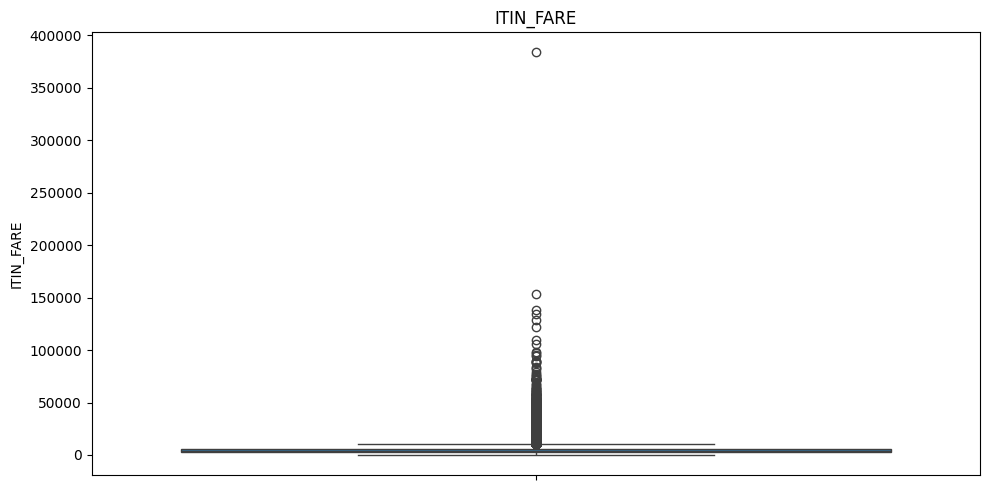

In [92]:

plt.figure(figsize=(10, 5))
sns.boxplot(y=ticket_df["ITIN_FARE"])
plt.title("ITIN_FARE")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

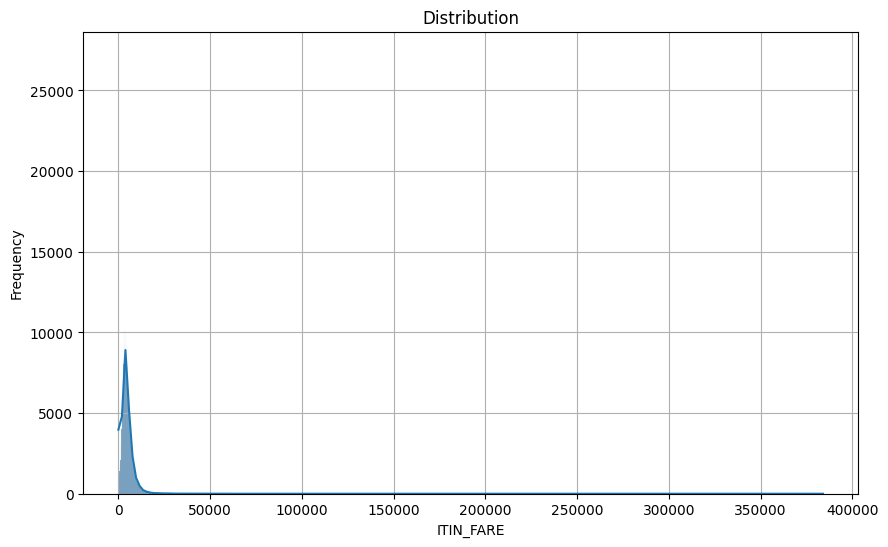

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(ticket_df["ITIN_FARE"], kde=True)
plt.title("Distribution")
plt.xlabel("ITIN_FARE")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)
plt.show()

In [94]:
# Check outliers using IQR
def removing_outlier_with_IQR(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.70)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  data_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return data_clean

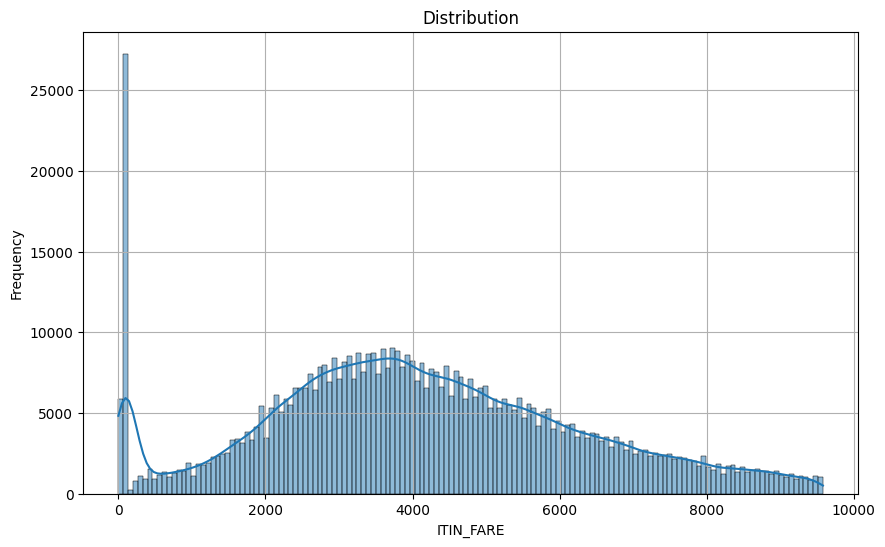

In [95]:
ticket_df = removing_outlier_with_IQR(ticket_df, "ITIN_FARE")
plt.figure(figsize=(10, 6))
sns.histplot(ticket_df["ITIN_FARE"], kde=True)
plt.title("Distribution")
plt.xlabel("ITIN_FARE")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


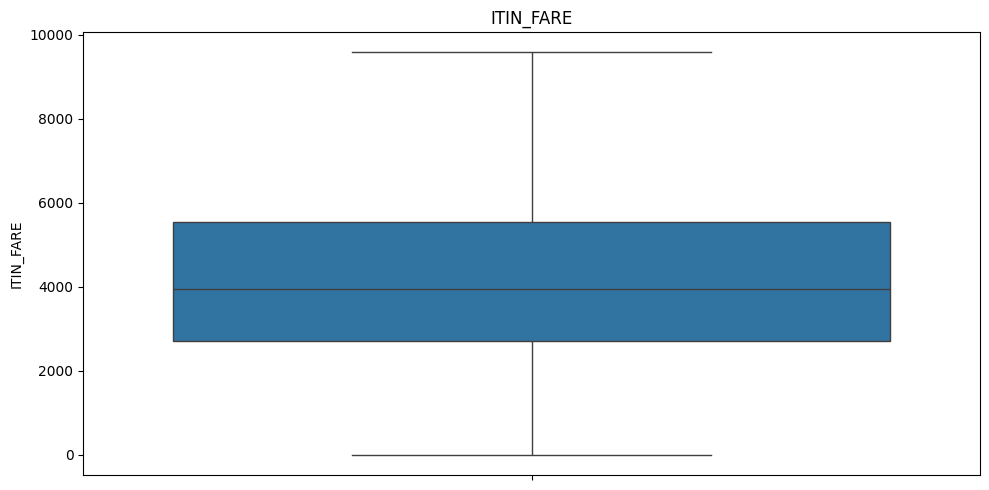

In [96]:
plt.figure(figsize=(10, 5))
# plt.subplot(1, len(non_object_columns.columns), i + 1)
sns.boxplot(y=ticket_df["ITIN_FARE"])
plt.title("ITIN_FARE")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [97]:
ticket_df_clean = removing_outlier_with_IQR(ticket_df, "ITIN_FARE")
ticket_df_clean["ITIN_FARE"].max(), ticket_df_clean["ITIN_FARE"].mean(), ticket_df_clean["ITIN_FARE"].min()

(8820.0, 4026.884692562919, 0.0)

In [98]:
ticket_df_clean

,ORIGIN,ITIN_FARE,DESTINATION
0,ABI,7360.00,DAB
1,ABI,5700.00,COS
2,ABI,5640.00,MCO
3,ABI,3450.00,LGA
11,ABI,4250.00,LIT
...,...,...,...
1115053,YUM,5850.00,FLL
1115057,YUM,6920.00,ALB
1115058,YUM,600.00,MRY
1115066,YUM,7050.00,ELP


In [99]:
ticket_df_clean = ticket_df_clean.assign(TRIP_ROUTE=ticket_df_clean["ORIGIN"] + "-" + ticket_df_clean["DESTINATION"])

ticket_df_clean

,ORIGIN,ITIN_FARE,DESTINATION,TRIP_ROUTE
0,ABI,7360.00,DAB,ABI-DAB
1,ABI,5700.00,COS,ABI-COS
2,ABI,5640.00,MCO,ABI-MCO
3,ABI,3450.00,LGA,ABI-LGA
11,ABI,4250.00,LIT,ABI-LIT
...,...,...,...,...
1115053,YUM,5850.00,FLL,YUM-FLL
1115057,YUM,6920.00,ALB,YUM-ALB
1115058,YUM,600.00,MRY,YUM-MRY
1115066,YUM,7050.00,ELP,YUM-ELP


In [100]:
# Find an average price that will be constant for an season
"""
I will take mean from each each route and the price will be the constant to that particular route whole year.
"""
ticket_df = ticket_df_clean.groupby(["TRIP_ROUTE"])["ITIN_FARE"].mean().reset_index()
ticket_df.rename(columns = {"ITIN_FARE":"AVG_TICKET_PRICE"}, inplace = True)
ticket_df

,TRIP_ROUTE,AVG_TICKET_PRICE
0,ABE-ABQ,5340.00
1,ABE-AGS,2990.00
2,ABE-AMA,6540.00
3,ABE-ASE,5950.00
4,ABE-ATL,4790.62
...,...,...
38134,YUM-SMF,2765.00
38135,YUM-SRQ,6960.00
38136,YUM-TOL,3350.00
38137,YUM-TPA,5443.33


**AIRPORT DATASET**

In [101]:
airport_df = read_dataset("/content/drive/My Drive/Colab Notebooks/Capital One/datasets/Airport_Codes.csv")
airport_df.head(5)

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.00,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.00,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.00,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.00,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.00,NaN,US,Newport,NaN,"-91.254898, 35.6087"


In [102]:
airport_df.tail(5)

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
55364,medium_airport,Yingkou Lanqi Airport,0.00,AS,CN,Yingkou,YKH,"122.3586, 40.542524"
55365,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,Shenyang,NaN,"123.49600219726562, 41.784400939941406"
55366,heliport,Sealand Helipad,40.00,EU,GB,Sealand,NaN,"1.4825, 51.894444"
55367,small_airport,Glorioso Islands Airstrip,11.00,AF,TF,Grande Glorieuse,NaN,"47.296388888900005, -11.584277777799999"
55368,small_airport,Satsuma IÅjima Airport,338.00,AS,JP,Mishima-Mura,NaN,"130.270556, 30.784722"


In [103]:
dataset_shape(airport_df)

(55369, 8)

In [104]:
dataset_info(airport_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [105]:
unique_values(airport_df)

,0
TYPE,7
NAME,52426
ELEVATION_FT,5478
CONTINENT,6
ISO_COUNTRY,242
MUNICIPALITY,27221
IATA_CODE,9062
COORDINATES,55240


In [106]:
check_missing_values(airport_df)

,0
TYPE,0
NAME,0
ELEVATION_FT,7015
CONTINENT,27843
ISO_COUNTRY,247
MUNICIPALITY,5706
IATA_CODE,46187
COORDINATES,0


In [107]:
# Columns with missing values: ELEVATION_FT, CONTINENT, ISO_COUNTRY, MUNICIPALITY, IATA_CODE

In [108]:
"""
Interested in Medium and large US Airports, I will filter where ISO_COUNTRY is US and TYPE is large_airport or medium_airport.
"""
airport_df = filter(airport_df, (airport_df["TYPE"].isin(["medium_airport", "large_airport"])) & (airport_df["ISO_COUNTRY"] == "US"))

In [109]:
airport_df

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
6194,medium_airport,Aleknagik / New Airport,66.00,NaN,US,Aleknagik,WKK,"-158.617996216, 59.2826004028"
25963,medium_airport,South Alabama Regional At Bill Benton Field Ai...,310.00,NaN,US,Andalusia/Opp,NaN,"-86.393799, 31.3088"
26143,medium_airport,Lehigh Valley International Airport,393.00,NaN,US,Allentown,ABE,"-75.44080352783203, 40.652099609375"
26144,medium_airport,Abilene Regional Airport,1791.00,NaN,US,Abilene,ABI,"-99.68190002440001, 32.4113006592"
26145,large_airport,Albuquerque International Sunport,5355.00,NaN,US,Albuquerque,ABQ,"-106.609001, 35.040199"
...,...,...,...,...,...,...,...,...
49351,medium_airport,Jim's Private Airport,890.00,NaN,US,Conyers,NaN,"-84.14440155, 33.59790039"
49519,medium_airport,Yuma Auxiliary AAF #2,NaN,NaN,US,NaN,NaN,"-114.511383, 32.548984"
49569,large_airport,atl,NaN,NaN,US,NaN,NaN,"-84.375, 33.137551"
49837,medium_airport,Williston Basin International Airport (U.C.),2344.00,NaN,US,Williston,NaN,"-103.748797, 48.258387"


In [110]:
check_missing_values(airport_df)

,0
TYPE,0
NAME,0
ELEVATION_FT,3
CONTINENT,858
ISO_COUNTRY,0
MUNICIPALITY,3
IATA_CODE,37
COORDINATES,0


In [111]:
"""
Since I have only Medium_airport and Large_airport. I will consider the column that will contribute to final analysis.
I will consider remaining with IATA_CODE, TYPE,
"""
airport_df = airport_df.drop(columns=["NAME", "ELEVATION_FT", "MUNICIPALITY", "COORDINATES", "ISO_COUNTRY", "CONTINENT"])
drop_nan_in_col(airport_df, "IATA_CODE")
airport_df

,TYPE,IATA_CODE
6194,medium_airport,WKK
26143,medium_airport,ABE
26144,medium_airport,ABI
26145,large_airport,ABQ
26146,medium_airport,ABR
...,...,...
38972,medium_airport,OGG
38974,medium_airport,BSF
38975,medium_airport,ITO
38976,medium_airport,UPP


**Data Preparation and Munging**

In [112]:
# Function that takes dataframe and merge them
# Merge Two DataFrames based on specfic keys
def merge_dataframes(df1, df2, df1_key, df2_key, how="inner"):
  if df2_key is None:
    df2_key = df1_key
  if isinstance(df2_key, str):
    df2_key = [df2_key]
  merged_df = pd.merge(df1, df2, left_on=df1_key, right_on=df2_key, how=how)
  return merged_df

In [113]:
# Merging flight dataset to airport code dataset
flight_Airport_df = merge_dataframes(flight_df, airport_df,"ORIGIN", "IATA_CODE", "inner")
flight_Airport_df

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,TRIP_ROUTE,TYPE,IATA_CODE
0,RSW,CLE,-8.00,-6.00,1025.00,0.97,RSW-CLE,large_airport,RSW
1,RSW,CMH,1.00,5.00,930.00,0.55,RSW-CMH,large_airport,RSW
2,RSW,CMH,0.00,4.00,930.00,0.91,RSW-CMH,large_airport,RSW
3,RSW,CMH,11.00,14.00,930.00,0.67,RSW-CMH,large_airport,RSW
4,RSW,DAL,0.00,-17.00,1005.00,0.62,RSW-DAL,large_airport,RSW
...,...,...,...,...,...,...,...,...,...
1471136,TUL,CLT,-9.00,-6.00,842.00,0.79,TUL-CLT,large_airport,TUL
1471137,TUL,CLT,-2.00,-1.00,842.00,0.54,TUL-CLT,large_airport,TUL
1471138,TUL,CLT,-8.00,-25.00,842.00,0.96,TUL-CLT,large_airport,TUL
1471139,TUL,CLT,-9.00,-6.00,842.00,0.60,TUL-CLT,large_airport,TUL


In [114]:
flight_Airport_df = merge_dataframes(flight_Airport_df, airport_df,"DESTINATION", "IATA_CODE", "inner")
flight_Airport_df

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,TRIP_ROUTE,TYPE_x,IATA_CODE_x,TYPE_y,IATA_CODE_y
0,RSW,CLE,-8.00,-6.00,1025.00,0.97,RSW-CLE,large_airport,RSW,large_airport,CLE
1,RSW,CMH,1.00,5.00,930.00,0.55,RSW-CMH,large_airport,RSW,large_airport,CMH
2,RSW,CMH,0.00,4.00,930.00,0.91,RSW-CMH,large_airport,RSW,large_airport,CMH
3,RSW,CMH,11.00,14.00,930.00,0.67,RSW-CMH,large_airport,RSW,large_airport,CMH
4,RSW,DAL,0.00,-17.00,1005.00,0.62,RSW-DAL,large_airport,RSW,large_airport,DAL
...,...,...,...,...,...,...,...,...,...,...,...
1458843,TUL,CLT,-9.00,-6.00,842.00,0.79,TUL-CLT,large_airport,TUL,large_airport,CLT
1458844,TUL,CLT,-2.00,-1.00,842.00,0.54,TUL-CLT,large_airport,TUL,large_airport,CLT
1458845,TUL,CLT,-8.00,-25.00,842.00,0.96,TUL-CLT,large_airport,TUL,large_airport,CLT
1458846,TUL,CLT,-9.00,-6.00,842.00,0.60,TUL-CLT,large_airport,TUL,large_airport,CLT


In [115]:
flight_Airport_tickets_df = merge_dataframes(flight_Airport_df, ticket_df,"TRIP_ROUTE", "TRIP_ROUTE", "inner")
flight_Airport_tickets_df

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,TRIP_ROUTE,TYPE_x,IATA_CODE_x,TYPE_y,IATA_CODE_y,AVG_TICKET_PRICE
0,RSW,CLE,-8.00,-6.00,1025.00,0.97,RSW-CLE,large_airport,RSW,large_airport,CLE,2011.04
1,RSW,CMH,1.00,5.00,930.00,0.55,RSW-CMH,large_airport,RSW,large_airport,CMH,2628.30
2,RSW,CMH,0.00,4.00,930.00,0.91,RSW-CMH,large_airport,RSW,large_airport,CMH,2628.30
3,RSW,CMH,11.00,14.00,930.00,0.67,RSW-CMH,large_airport,RSW,large_airport,CMH,2628.30
4,RSW,DAL,0.00,-17.00,1005.00,0.62,RSW-DAL,large_airport,RSW,large_airport,DAL,3482.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1442788,TUL,CLT,-9.00,-6.00,842.00,0.79,TUL-CLT,large_airport,TUL,large_airport,CLT,5414.35
1442789,TUL,CLT,-2.00,-1.00,842.00,0.54,TUL-CLT,large_airport,TUL,large_airport,CLT,5414.35
1442790,TUL,CLT,-8.00,-25.00,842.00,0.96,TUL-CLT,large_airport,TUL,large_airport,CLT,5414.35
1442791,TUL,CLT,-9.00,-6.00,842.00,0.60,TUL-CLT,large_airport,TUL,large_airport,CLT,5414.35


In [116]:
flight_Airport_tickets_df.rename(columns = {"TYPE_x":"ORIGIN_AIR_PORT_TYPE", "TYPE_y":"DEST_AIR_PORT_TYPE" }, inplace = True)
flight_Airport_tickets_df

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,TRIP_ROUTE,ORIGIN_AIR_PORT_TYPE,IATA_CODE_x,DEST_AIR_PORT_TYPE,IATA_CODE_y,AVG_TICKET_PRICE
0,RSW,CLE,-8.00,-6.00,1025.00,0.97,RSW-CLE,large_airport,RSW,large_airport,CLE,2011.04
1,RSW,CMH,1.00,5.00,930.00,0.55,RSW-CMH,large_airport,RSW,large_airport,CMH,2628.30
2,RSW,CMH,0.00,4.00,930.00,0.91,RSW-CMH,large_airport,RSW,large_airport,CMH,2628.30
3,RSW,CMH,11.00,14.00,930.00,0.67,RSW-CMH,large_airport,RSW,large_airport,CMH,2628.30
4,RSW,DAL,0.00,-17.00,1005.00,0.62,RSW-DAL,large_airport,RSW,large_airport,DAL,3482.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1442788,TUL,CLT,-9.00,-6.00,842.00,0.79,TUL-CLT,large_airport,TUL,large_airport,CLT,5414.35
1442789,TUL,CLT,-2.00,-1.00,842.00,0.54,TUL-CLT,large_airport,TUL,large_airport,CLT,5414.35
1442790,TUL,CLT,-8.00,-25.00,842.00,0.96,TUL-CLT,large_airport,TUL,large_airport,CLT,5414.35
1442791,TUL,CLT,-9.00,-6.00,842.00,0.60,TUL-CLT,large_airport,TUL,large_airport,CLT,5414.35


**Different columns will be create:**

Columns that will be created:
1. Number of passengers
2. Cost of operation
3. Cost of Maintenance and Cost of Depreciation
4. Cost of Delay
5. Total Cost
6. Revenue from Baggage
7. Revenue from Tickets
8. Total Revenue
9. Profit

In [117]:
def create_feature_based_on_condition(df, new_columns):
  if new_columns:
    for col_name, col_func in new_columns.items():
      df[col_name] = df.apply(col_func, axis=1)
  else:
    print("Expecting At Least Element In Dictionary!!")
  return df

In [118]:
def calculate_delay_cost(row):
  dep_delay = 0
  arr_delay = 0
  if row["DEP_DELAY"] > 15:
    dep_delay = (row["DEP_DELAY"] - 15) * 75

  if row["ARR_DELAY"] > 15:
    arr_delay = (row["ARR_DELAY"] - 15) * 75

  return dep_delay + arr_delay

def airport_operation_cost(row):
  origin_operation_cost = 10000 if row["ORIGIN_AIR_PORT_TYPE"] == "large_airport" else 5000
  destination_operation_cost = 10000 if row["DEST_AIR_PORT_TYPE"] == "large_airport" else 5000
  return origin_operation_cost + destination_operation_cost


new_columns = {
    "PASSENGERS": lambda row: 200 * row["OCCUPANCY_RATE"],
    "DELAY_COST": calculate_delay_cost,
    "DEP_ME_COST": lambda row: row["DISTANCE"] * (8 + 1.18),
    "OPERATION_COST": airport_operation_cost,
    "TOTAL_COST": lambda row: row["DELAY_COST"] + row["OPERATION_COST"] + row["DEP_ME_COST"],
    "BAGGAGE_FEE": lambda row: row["PASSENGERS"] * 0.5 * 70,
    "TICKET_REVENUE": lambda row: row["PASSENGERS"] * row["AVG_TICKET_PRICE"],
    "TOTAL_REVENUE": lambda row: row["TICKET_REVENUE"] + row["BAGGAGE_FEE"],
    "PROFIT": lambda row: row["TOTAL_REVENUE"] - row["TOTAL_COST"]

}

flight_Airport_tickets_df = create_feature_based_on_condition(flight_Airport_tickets_df, new_columns=new_columns)
flight_Airport_tickets_df

,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,TRIP_ROUTE,ORIGIN_AIR_PORT_TYPE,IATA_CODE_x,DEST_AIR_PORT_TYPE,...,AVG_TICKET_PRICE,PASSENGERS,DELAY_COST,DEP_ME_COST,OPERATION_COST,TOTAL_COST,BAGGAGE_FEE,TICKET_REVENUE,TOTAL_REVENUE,PROFIT
0,RSW,CLE,-8.00,-6.00,1025.00,0.97,RSW-CLE,large_airport,RSW,large_airport,...,2011.04,194.00,0.00,9409.50,20000,29409.50,6790.00,390142.69,396932.69,367523.19
1,RSW,CMH,1.00,5.00,930.00,0.55,RSW-CMH,large_airport,RSW,large_airport,...,2628.30,110.00,0.00,8537.40,20000,28537.40,3850.00,289113.21,292963.21,264425.81
2,RSW,CMH,0.00,4.00,930.00,0.91,RSW-CMH,large_airport,RSW,large_airport,...,2628.30,182.00,0.00,8537.40,20000,28537.40,6370.00,478350.94,484720.94,456183.54
3,RSW,CMH,11.00,14.00,930.00,0.67,RSW-CMH,large_airport,RSW,large_airport,...,2628.30,134.00,0.00,8537.40,20000,28537.40,4690.00,352192.45,356882.45,328345.05
4,RSW,DAL,0.00,-17.00,1005.00,0.62,RSW-DAL,large_airport,RSW,large_airport,...,3482.00,124.00,0.00,9225.90,20000,29225.90,4340.00,431768.00,436108.00,406882.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442788,TUL,CLT,-9.00,-6.00,842.00,0.79,TUL-CLT,large_airport,TUL,large_airport,...,5414.35,158.98,0.00,7729.56,20000,27729.56,5564.19,860756.22,866320.41,838590.85
1442789,TUL,CLT,-2.00,-1.00,842.00,0.54,TUL-CLT,large_airport,TUL,large_airport,...,5414.35,107.68,0.00,7729.56,20000,27729.56,3768.79,583015.40,586784.19,559054.63
1442790,TUL,CLT,-8.00,-25.00,842.00,0.96,TUL-CLT,large_airport,TUL,large_airport,...,5414.35,191.12,0.00,7729.56,20000,27729.56,6689.05,1034767.48,1041456.54,1013726.98
1442791,TUL,CLT,-9.00,-6.00,842.00,0.60,TUL-CLT,large_airport,TUL,large_airport,...,5414.35,119.07,0.00,7729.56,20000,27729.56,4167.41,644680.21,648847.62,621118.06


In [119]:
"""
Since all dataset merged together,will drop column that do not have impact on analysis
"""
columns_to_drop = ["ORIGIN", "DESTINATION",	"DISTANCE",	"OCCUPANCY_RATE",	"ORIGIN_AIR_PORT_TYPE",	"IATA_CODE_x", "DEST_AIR_PORT_TYPE", "IATA_CODE_y"]
final_df = drop(flight_Airport_tickets_df, columns_to_drop)

In [120]:
final_df

,DEP_DELAY,ARR_DELAY,TRIP_ROUTE,AVG_TICKET_PRICE,PASSENGERS,DELAY_COST,DEP_ME_COST,OPERATION_COST,TOTAL_COST,BAGGAGE_FEE,TICKET_REVENUE,TOTAL_REVENUE,PROFIT
0,-8.00,-6.00,RSW-CLE,2011.04,194.00,0.00,9409.50,20000,29409.50,6790.00,390142.69,396932.69,367523.19
1,1.00,5.00,RSW-CMH,2628.30,110.00,0.00,8537.40,20000,28537.40,3850.00,289113.21,292963.21,264425.81
2,0.00,4.00,RSW-CMH,2628.30,182.00,0.00,8537.40,20000,28537.40,6370.00,478350.94,484720.94,456183.54
3,11.00,14.00,RSW-CMH,2628.30,134.00,0.00,8537.40,20000,28537.40,4690.00,352192.45,356882.45,328345.05
4,0.00,-17.00,RSW-DAL,3482.00,124.00,0.00,9225.90,20000,29225.90,4340.00,431768.00,436108.00,406882.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442788,-9.00,-6.00,TUL-CLT,5414.35,158.98,0.00,7729.56,20000,27729.56,5564.19,860756.22,866320.41,838590.85
1442789,-2.00,-1.00,TUL-CLT,5414.35,107.68,0.00,7729.56,20000,27729.56,3768.79,583015.40,586784.19,559054.63
1442790,-8.00,-25.00,TUL-CLT,5414.35,191.12,0.00,7729.56,20000,27729.56,6689.05,1034767.48,1041456.54,1013726.98
1442791,-9.00,-6.00,TUL-CLT,5414.35,119.07,0.00,7729.56,20000,27729.56,4167.41,644680.21,648847.62,621118.06


**DATA ANALYST**

ANSWERING BUSINESS QUESTIONS


In [121]:
# The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
# Exclude canceled flights when performing the calculation.

In [122]:
# Handling Biderictional Round-trip
def preprocess_trip_route(route):
  airports = route.split("-")
  return "-".join(sorted(airports))

In [123]:
final_df["TRIP_ROUTE"] = final_df["TRIP_ROUTE"].apply(preprocess_trip_route)

In [124]:
busiest_routes = final_df.groupby("TRIP_ROUTE")["TRIP_ROUTE"].count().reset_index(name="NUMBER_OF_FLIGHTS").sort_values("NUMBER_OF_FLIGHTS", ascending=False)
top_10_busiest_routes = busiest_routes.head(10)
top_10_busiest_routes

,TRIP_ROUTE,NUMBER_OF_FLIGHTS
1981,LAX-SFO,6217
1899,LAS-LAX,5448
2020,LGA-ORD,5197
1650,HNL-OGG,4631
1980,LAX-SEA,4256
178,ATL-MCO,4241
2393,PDX-SEA,4100
146,ATL-FLL,4036
174,ATL-LGA,3780
517,BOS-LGA,3665


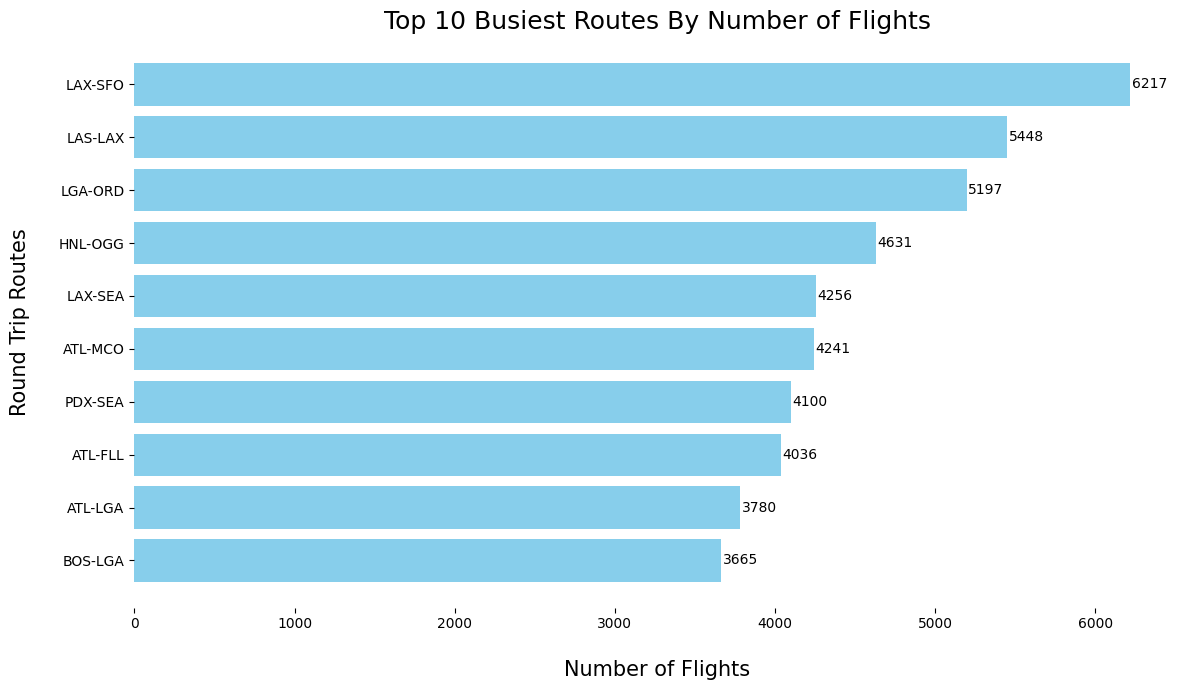

In [125]:
top_1O_routes = top_10_busiest_routes["TRIP_ROUTE"]
numumber_of_flights = top_10_busiest_routes["NUMBER_OF_FLIGHTS"]

plt.figure(figsize=(12, 7))
bars = plt.barh(top_1O_routes, numumber_of_flights, color = "skyblue", label = "Number of Flights")
plt.xlabel("\nNumber of Flights", size=15)
plt.ylabel("Round Trip Routes\n", size=15)
plt.title("Top 10 Busiest Routes By Number of Flights", size=18)
plt.gca().invert_yaxis()
for bar in bars:
  plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center', ha='left')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.tight_layout()
plt.show()

In [126]:
# The 10 most profitable round trip routes (without considering the upfront airplane cost) in
# the quarter. Along with the profit, show total revenue, total cost, summary values of
# other key components and total round trip flights in the quarter for the top 10 most
# profitable routes. Exclude canceled flights from these calculations.

In [127]:
profitable_routes = final_df.groupby("TRIP_ROUTE").agg({
    "PROFIT": "sum",
    "TOTAL_REVENUE": "sum",
    "TOTAL_COST": "sum",
    "DELAY_COST": "mean",
    "OPERATION_COST": "sum",
    "DEP_ME_COST": "sum",
    "AVG_TICKET_PRICE": "mean",
    "DEP_DELAY": "mean",
    "ARR_DELAY": "mean",
    "PASSENGERS": "sum",
    "TRIP_ROUTE": "count"
}).rename(columns={"TRIP_ROUTE": "ROUND_TRIP_FLIGHTS", "AVG_TICKET_PRICE": "TICKET_PRICE"}).sort_values("PROFIT", ascending=False)

print("\nThe Top 10 Profitable Round Trip Routes!!\n")
top_10_profitable_routes = profitable_routes.head(10)
top_10_profitable_routes


The Top 10 Profitable Round Trip Routes!!



,PROFIT,TOTAL_REVENUE,TOTAL_COST,DELAY_COST,OPERATION_COST,DEP_ME_COST,TICKET_PRICE,DEP_DELAY,ARR_DELAY,PASSENGERS,ROUND_TRIP_FLIGHTS
TRIP_ROUTE,,,,,,,,,,,
LAX-SFO,2145663146.27,2289553155.49,143890009.22,50.94,124340000,19233284.22,2792.81,-2.12,-8.36,809374.00,6217
LGA-ORD,2121006408.60,2260261559.78,139255151.18,66.36,103940000,34970301.18,3325.17,-1.74,-7.57,672648.00,5197
DCA-ORD,1897835036.88,1976935899.16,79100862.28,38.95,61660000,17320787.28,4895.27,-3.34,-9.25,400994.00,3083
LAX-SEA,1820006779.57,1942627035.89,122620256.32,53.43,85120000,37272856.32,3452.22,-1.70,-6.75,557072.00,4256
ATL-LGA,1754042872.40,1856266527.20,102223654.80,48.13,75600000,26441704.80,3730.32,-0.46,-8.32,492948.00,3780
ATL-MCO,1634840036.90,1735552668.42,100712631.52,38.66,84820000,15728681.52,3110.05,0.04,-5.44,552006.00,4241
ATL-DCA,1610520697.94,1688062916.64,77542218.70,32.57,61900000,15541418.70,4164.38,-1.19,-7.30,401988.00,3095
ATL-CLT,1605875115.44,1667518998.28,61643882.84,35.75,55760000,5784207.84,4581.78,-1.47,-7.93,361274.00,2788
BOS-LGA,1595534036.34,1675178711.14,79644674.80,42.03,73300000,6190624.80,3455.37,-3.16,-11.60,479984.00,3665


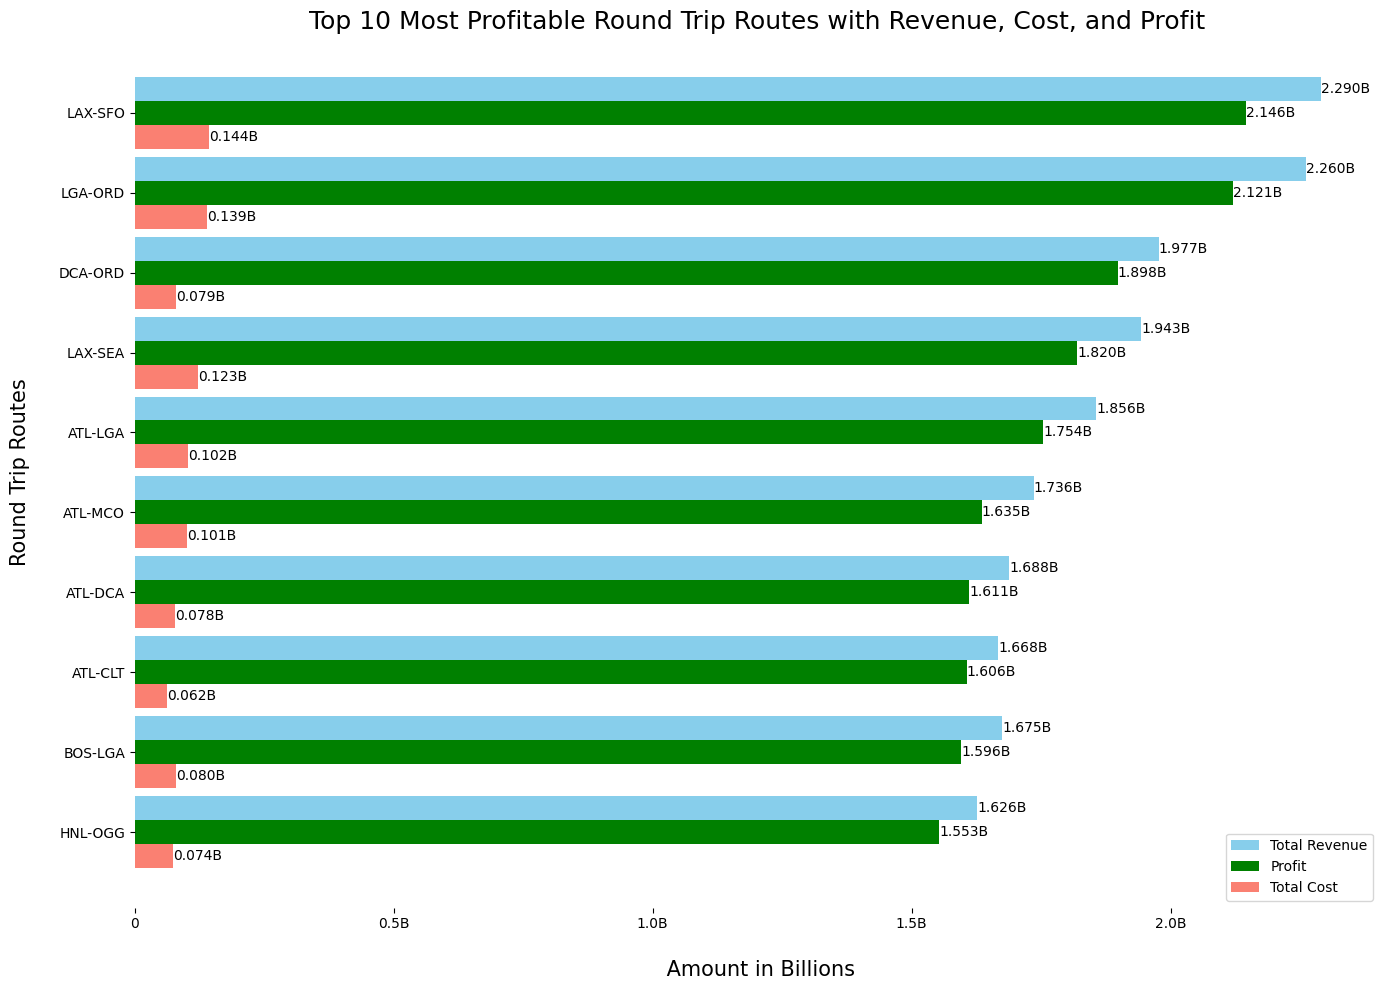

In [128]:
top_10_profitable_routes.sort_values(by="PROFIT", ascending=False)
plt.figure(figsize=(14, 10))
index = np.arange(len(top_10_profitable_routes))
bar_width = 0.30

bars1 = plt.barh(index - bar_width, top_10_profitable_routes['TOTAL_REVENUE'], bar_width, label='Total Revenue', color='skyblue')
bars2 = plt.barh(index, top_10_profitable_routes['PROFIT'], bar_width, label='Profit', color='green')
bars3 = plt.barh(index + bar_width, top_10_profitable_routes['TOTAL_COST'], bar_width, label='Total Cost', color='salmon')

plt.xlabel('\n Amount in Billions', size=15)
plt.ylabel('Round Trip Routes\n', size=15)
plt.title('Top 10 Most Profitable Round Trip Routes with Revenue, Cost, and Profit', size=18)
plt.yticks(index, top_10_profitable_routes.index)
plt.gca().invert_yaxis()

def formatter_(x, pos):
  if x == 0:
    return '0'
  else:
    return f'{x/1e9:.1f}B'

formatter = FuncFormatter(formatter_)
plt.gca().xaxis.set_major_formatter(formatter)

for bars in [bars1, bars2, bars3]:
  for bar in bars:
    annot_text = f'{bar.get_width()/1e9:.3f}B'
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, annot_text, va='center', ha='left', fontsize=10)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.legend()
plt.tight_layout()
plt.show()


In [129]:
# The 5 round trip routes that you recommend to invest in based on any factors that you
# choose.
"""
Considering that company motto is to be on time, Will recommend routes to invest in based on three things
1. Return on investment
2. delay cost:
3. Total number of flights
4. Total Number of Passengres
Based on my metric: ROI be wiegthed 60%, delay cost be wieghted 20% and number of flights 10% and passengers 10%
"""
profitable_routes["ROI"] = profitable_routes['PROFIT'] / profitable_routes['TOTAL_COST']
profitable_routes['RECOMMENDATION_SCORE'] = (profitable_routes["ROI"] * 0.6) - (profitable_routes['DELAY_COST'] * 0.2) + (profitable_routes['PASSENGERS'] * 0.1) + (profitable_routes['ROUND_TRIP_FLIGHTS'] * 0.1)
profitable_routes['RECOMMENDATION_SCORE'] = profitable_routes['RECOMMENDATION_SCORE'] / profitable_routes['RECOMMENDATION_SCORE'].max() * 100
profitable_routes

,PROFIT,TOTAL_REVENUE,TOTAL_COST,DELAY_COST,OPERATION_COST,DEP_ME_COST,TICKET_PRICE,DEP_DELAY,ARR_DELAY,PASSENGERS,ROUND_TRIP_FLIGHTS,ROI,RECOMMENDATION_SCORE
TRIP_ROUTE,,,,,,,,,,,,,
LAX-SFO,2145663146.27,2289553155.49,143890009.22,50.94,124340000,19233284.22,2792.81,-2.12,-8.36,809374.00,6217,14.91,100.00
LGA-ORD,2121006408.60,2260261559.78,139255151.18,66.36,103940000,34970301.18,3325.17,-1.74,-7.57,672648.00,5197,15.23,83.11
DCA-ORD,1897835036.88,1976935899.16,79100862.28,38.95,61660000,17320787.28,4895.27,-3.34,-9.25,400994.00,3083,23.99,49.55
LAX-SEA,1820006779.57,1942627035.89,122620256.32,53.43,85120000,37272856.32,3452.22,-1.70,-6.75,557072.00,4256,14.84,68.82
ATL-LGA,1754042872.40,1856266527.20,102223654.80,48.13,75600000,26441704.80,3730.32,-0.46,-8.32,492948.00,3780,17.16,60.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEN-PAE,373629.04,422650.00,49020.96,0.00,30000,19020.96,1940.00,-7.00,-14.50,214.00,2,7.62,0.03
CDV-YAK,359256.30,1023700.00,664443.70,125.45,550000,107543.70,110.00,-7.69,-4.45,7060.00,55,0.54,0.84
MSP-RNO,245337.41,278235.31,32897.90,0.00,20000,12897.90,4452.67,-2.00,-39.00,62.00,1,7.46,0.01


In [130]:
top_5_investment_recommendations = profitable_routes.nlargest(5, "RECOMMENDATION_SCORE")
top_5_investment_recommendations

,PROFIT,TOTAL_REVENUE,TOTAL_COST,DELAY_COST,OPERATION_COST,DEP_ME_COST,TICKET_PRICE,DEP_DELAY,ARR_DELAY,PASSENGERS,ROUND_TRIP_FLIGHTS,ROI,RECOMMENDATION_SCORE
TRIP_ROUTE,,,,,,,,,,,,,
LAX-SFO,2145663146.27,2289553155.49,143890009.22,50.94,124340000,19233284.22,2792.81,-2.12,-8.36,809374.00,6217,14.91,100.00
LAS-LAX,1456956878.67,1577990686.71,121033808.04,49.71,108960000,11802983.04,2197.62,-0.99,-5.35,706478.00,5448,12.04,87.29
LGA-ORD,2121006408.60,2260261559.78,139255151.18,66.36,103940000,34970301.18,3325.17,-1.74,-7.57,672648.00,5197,15.23,83.11
HNL-OGG,1552629560.48,1626496493.48,73866933.00,32.54,69465000,4251258.00,2676.49,-1.87,-1.73,599832.00,4631,21.02,74.12
LAX-SEA,1820006779.57,1942627035.89,122620256.32,53.43,85120000,37272856.32,3452.22,-1.70,-6.75,557072.00,4256,14.84,68.82


In [131]:
# The number of round trip flights it will take to breakeven on the upfront airplane cost for
# each of the 5 round trip routes that you recommend. Print key summary components for
# these routes.
def calculate_break_even(row, up_front_cost = 90000000):
  fixed_costs = up_front_cost + row["OPERATION_COST"]
  variable_costs_per_round_trip = row["DEP_ME_COST"] / row["ROUND_TRIP_FLIGHTS"]
  revenue_per_round_trip = row["TOTAL_REVENUE"] / row["ROUND_TRIP_FLIGHTS"]
  contribution_margin_per_round_trip = revenue_per_round_trip - variable_costs_per_round_trip
  break_even_round_trips = fixed_costs / contribution_margin_per_round_trip
  return break_even_round_trips

top_5_investment_recommendations["BREAK_EVEN_ROUND_TRIPS"] = top_5_investment_recommendations.apply(calculate_break_even, axis=1)

top_5_investment_recommendations_break_point = top_5_investment_recommendations.reset_index()
print("\nTop 5 Profitable Routes with Break-Even Points\n")
top_5_investment_recommendations_break_point = top_5_investment_recommendations_break_point[["TRIP_ROUTE", "PROFIT", "TOTAL_REVENUE", "TOTAL_COST", "BREAK_EVEN_ROUND_TRIPS"]]
top_5_investment_recommendations_break_point = top_5_investment_recommendations_break_point.sort_values(by="BREAK_EVEN_ROUND_TRIPS", ascending=True)
top_5_investment_recommendations_break_point


Top 5 Profitable Routes with Break-Even Points



,TRIP_ROUTE,PROFIT,TOTAL_REVENUE,TOTAL_COST,BREAK_EVEN_ROUND_TRIPS
4,LAX-SEA,1820006779.57,1942627035.89,122620256.32,391.17
2,LGA-ORD,2121006408.60,2260261559.78,139255151.18,452.93
3,HNL-OGG,1552629560.48,1626496493.48,73866933.00,455.22
0,LAX-SFO,2145663146.27,2289553155.49,143890009.22,586.94
1,LAS-LAX,1456956878.67,1577990686.71,121033808.04,692.08


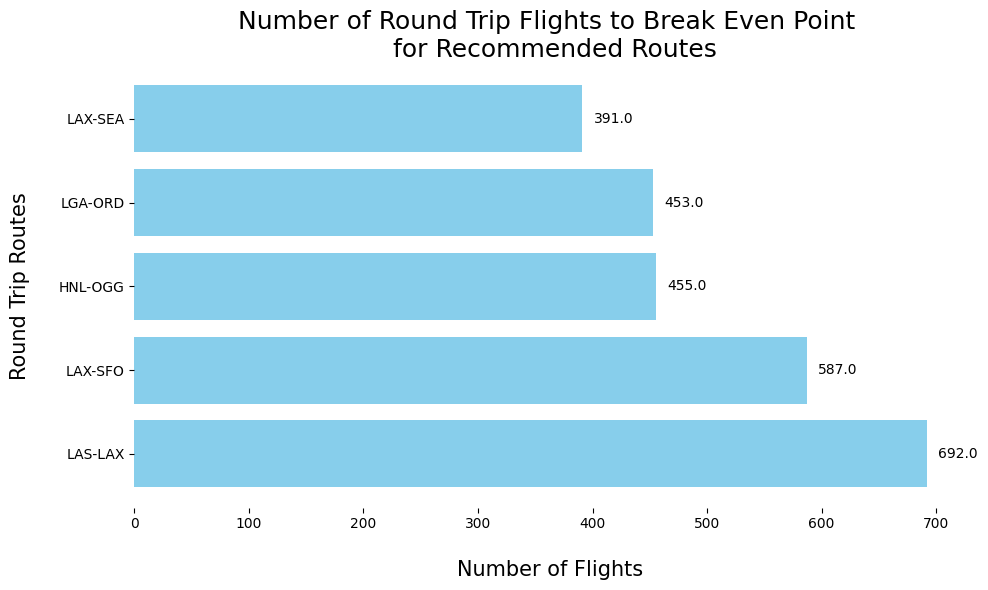

In [132]:
# Extract the top 5 routes and their corresponding break-even round trips from the DataFrame and plotting them on the graph
top_5_routes = top_5_investment_recommendations_break_point["TRIP_ROUTE"]
break_even_round_trips = top_5_investment_recommendations_break_point["BREAK_EVEN_ROUND_TRIPS"].round()

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_routes, break_even_round_trips, color = "skyblue", label = "Number of Flights")
plt.xlabel("\nNumber of Flights", size=15)
plt.ylabel("Round Trip Routes\n", size=15)
plt.title("Number of Round Trip Flights to Break Even Point \n for Recommended Routes", size=18)
plt.gca().invert_yaxis()
for bar in bars:
  plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center', ha='left')
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.tight_layout()
plt.show()